# Iris Plants Dataset

Um dos bancos mais usados para iniciar os estudos de reconhecimento de padrão.
Banco possui 3 classes, cada uma com 50 amostras.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv('iris.data', header=None)

In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

O banco não apresenta valores nulos


In [6]:
dataset.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visialização da descrição apenas de valores não numericos

In [7]:
dataset.describe(include=[np.object])

,4
count,150
unique,3
top,Iris-setosa
freq,50


Visialização da descrição de todos os tipos de variáveis

In [8]:
dataset.describe(include='all')

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Divisão do banco: train/test

In [9]:
X = pd.DataFrame(dataset.iloc[:,:-1])
Y = pd.DataFrame(dataset.iloc[:, -1])

encoder_y = LabelEncoder() 
Y = pd.DataFrame( encoder_y.fit_transform(Y))

print(X.shape, Y.shape)
print(type(X), type(Y))

(150, 4) (150, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


C:\Users\igorl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42 )

In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


In [11]:
x_train.describe()

,0,1,2,3
count,120.000000,120.000000,120.000000,120.000000
mean,5.864167,3.047500,3.805000,1.218333
std,0.843243,0.433466,1.776166,0.759808
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.425000,3.400000,5.125000,1.825000
max,7.900000,4.200000,6.700000,2.500000


In [12]:
x_test.describe()

,0,1,2,3
count,30.000000,30.000000,30.000000,30.000000
mean,5.760000,3.080000,3.573333,1.120000
std,0.772189,0.440533,1.733630,0.784505
min,4.600000,2.200000,1.400000,0.100000
25%,5.050000,2.800000,1.500000,0.200000
50%,5.700000,3.100000,4.300000,1.300000
75%,6.300000,3.200000,4.875000,1.600000
max,7.700000,4.400000,6.900000,2.400000


### Analisando os dados 

A partir daqui só usamos os dados do treino.

Devemos assumir que é o úncio dado que temos. Os dados do teste debem ser usado para isso: TESTAR

In [13]:
y_train.columns = ['label']
corr = pd.concat([x_train, y_train ], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,label
0,1,-0.0546193,0.865739,0.803856,0.773956
1,-0.0546193,1,-0.381127,-0.315989,-0.391341
2,0.865739,-0.381127,1,0.959545,0.953918
3,0.803856,-0.315989,0.959545,1,0.958777
label,0.773956,-0.391341,0.953918,0.958777,1


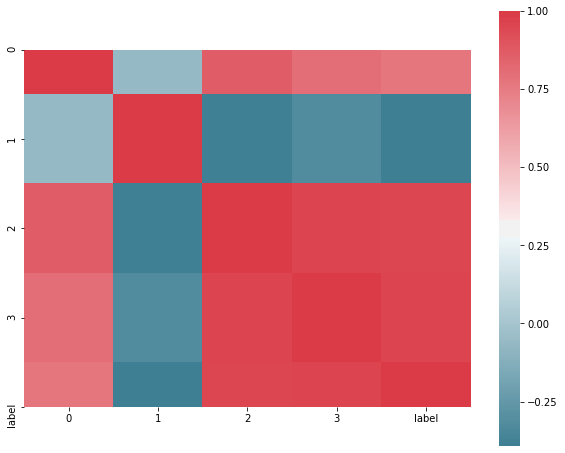

In [14]:
import seaborn as sns
import matplotlib.pyplot as pl
f, ax = pl.subplots(figsize=(10, 8))
corr = pd.concat([x_train, y_train ], axis=1).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

C:\Users\igor.lucena\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\igor.lucena\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


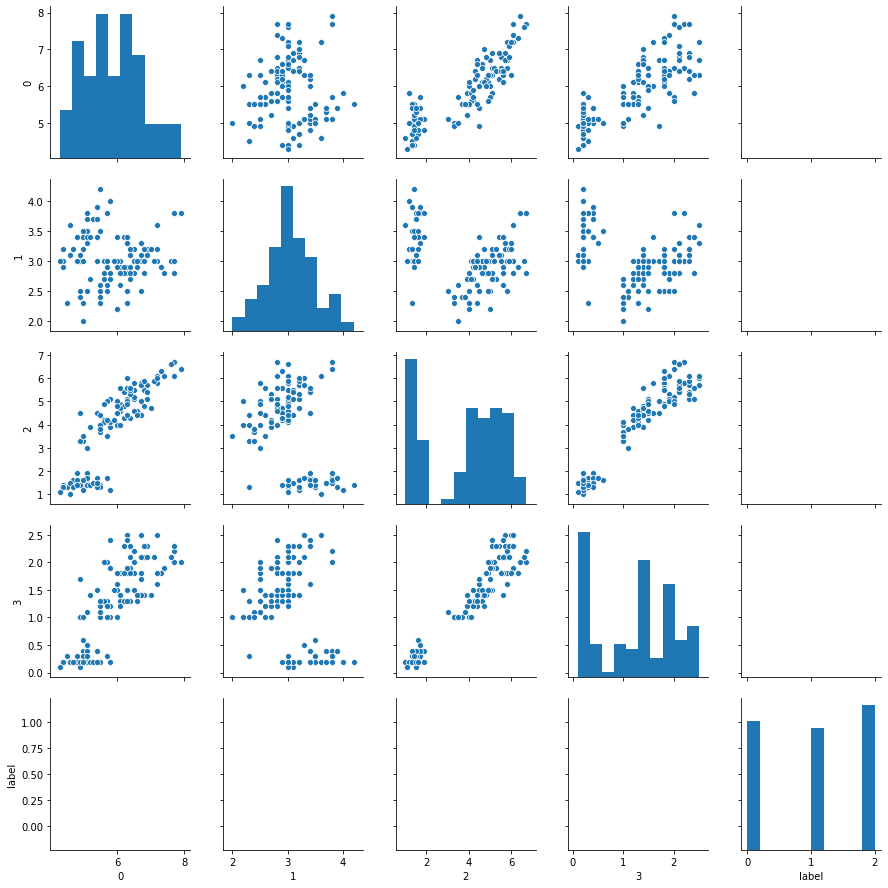

In [15]:
# Basic correlogram
sns.pairplot(pd.concat([x_train, y_train]))

In [16]:
x_train.describe()

,0,1,2,3
count,120.000000,120.000000,120.000000,120.000000
mean,5.864167,3.047500,3.805000,1.218333
std,0.843243,0.433466,1.776166,0.759808
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.425000,3.400000,5.125000,1.825000
max,7.900000,4.200000,6.700000,2.500000


## Feature Scaling

Pré-processamento dos dados 

In [17]:
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler, MinMaxScaler, RobustScaler

In [18]:
scaler = StandardScaler()# alterar
x_train_norm =  pd.DataFrame(scaler.fit_transform(x_train)) 

In [19]:
x_train_norm.describe().round(3)

,0,1,2,3
count,120.000,120.000,120.000,120.000
mean,-0.000,0.000,-0.000,0.000
std,1.004,1.004,1.004,1.004
min,-1.863,-2.427,-1.586,-1.478
25%,-0.910,-0.573,-1.247,-1.214
50%,-0.076,-0.110,0.308,0.108
75%,0.668,0.817,0.746,0.802
max,2.424,2.670,1.637,1.694


**O objeto usado para escalar os valores no treinamento deve ser guardado pois o mesmo processo deve ser aplicado ao conjunto de teste**

## Treinamento 


In [20]:
# metricas
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()
rf.fit(x_train_norm, y_train)

pred = rf.predict(x_train_norm)
print('accuracy', accuracy_score(y_train,pred))
print('precision', precision_score(y_train,pred,average='micro' ))
print('recall', recall_score(y_train,pred, average='micro'))
print('f1', f1_score(y_train,pred,average='micro'))
confusion_matrix(y_train,pred)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


C:\Users\igor.lucena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\igor.lucena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

## Test

Primeiro passo para iniciar os testes é pré-processar os dados da mesma maneira


In [23]:
x_test_norm = scaler.transform(x_test)

Executar a predição e vericiar sua acurácia

In [24]:
pred = rf.predict(x_test_norm)
print('accuracy', accuracy_score(y_test,pred))
print('precision', precision_score(y_test,pred,average='micro' ))
print('recall', recall_score(y_test,pred, average='micro'))
print('f1', f1_score(y_test,pred,average='micro'))
confusion_matrix(y_test,pred)

accuracy 0.9333333333333333
precision 0.9333333333333333
recall 0.9333333333333333
f1 0.9333333333333333


array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]], dtype=int64)